In [2]:
import pandas as pd

# 定义文件路径
file_path = r"./附件一（训练集）.xlsx"

# 读取Excel文件
data = pd.read_excel(file_path)

# 输出数据的前几行查看
print(data.head())


   温度，oC  频率，Hz    磁芯损耗，w/m3 励磁波形  0（磁通密度B，T）         1         2         3  \
0     25  50030  1997.955250  正弦波    0.000213  0.000389  0.000566  0.000743   
1     25  50020  2427.749830  正弦波   -0.000551 -0.000358 -0.000165  0.000028   
2     25  50020  3332.725760  正弦波   -0.003780 -0.003564 -0.003349 -0.003134   
3     25  50020  4502.908007  正弦波   -0.000511 -0.000267 -0.000023  0.000222   
4     25  50030  6063.023248  正弦波    0.000458  0.000732  0.001007  0.001281   

          4         5  ...      1014      1015      1016      1017      1018  \
0  0.000919  0.001096  ... -0.001551 -0.001374 -0.001198 -0.001022 -0.000846   
1  0.000221  0.000413  ... -0.002476 -0.002284 -0.002091 -0.001899 -0.001707   
2 -0.002919 -0.002704  ... -0.005927 -0.005713 -0.005499 -0.005285 -0.005070   
3  0.000466  0.000711  ... -0.002950 -0.002707 -0.002463 -0.002220 -0.001976   
4  0.001555  0.001830  ... -0.002290 -0.002016 -0.001741 -0.001466 -0.001192   

       1019      1020      1021      1022   

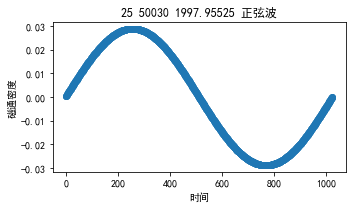

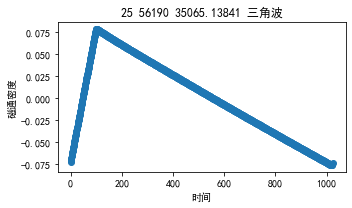

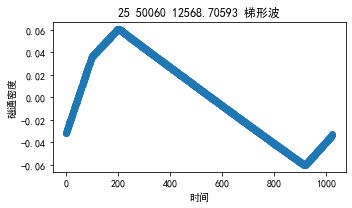

In [35]:
import pandas as pd  
import matplotlib.pyplot as plt  
i_signal=0
# 设置 Matplotlib 使用支持中文的字体  
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体  
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题 
selected_data = data.iloc[i_signal, 4:]  
x = range(len(selected_data))  # 生成一个和selected_data长度相同的索引列表  
# 读取第一行的前四列  
param = data.iloc[i_signal, :4]  
# 将这些值合并成一个标题字符串，这里使用空格分隔  
title = ' '.join(str(x) for x in param)  
# 绘制数据  
plt.figure(figsize=(5, 3))  # 设置图像大小  
plt.plot(x, selected_data, marker='o')  # 绘制折线图，并添加数据点  
plt.xlabel('时间')  # x轴标签  
plt.ylabel('磁通密度')  # y轴标签  
plt.title(title)  # 图像标题  
plt.tight_layout()  # 自动调整子图参数, 使之填充整个图像区域  
plt.show()

i_signal=1067
# 设置 Matplotlib 使用支持中文的字体  
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体  
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题 
selected_data = data.iloc[i_signal, 4:]  
x = range(len(selected_data))  # 生成一个和selected_data长度相同的索引列表  
# 读取第一行的前四列  
param = data.iloc[i_signal, :4]  
# 将这些值合并成一个标题字符串，这里使用空格分隔  
title = ' '.join(str(x) for x in param)  
# 绘制数据  
plt.figure(figsize=(5, 3))  # 设置图像大小  
plt.plot(x, selected_data, marker='o')  # 绘制折线图，并添加数据点  
plt.xlabel('时间')  # x轴标签  
plt.ylabel('磁通密度')  # y轴标签  
plt.title(title)  # 图像标题  
plt.tight_layout()  # 自动调整子图参数, 使之填充整个图像区域  
plt.show()

i_signal=2370
# 设置 Matplotlib 使用支持中文的字体  
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体  
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题 
selected_data = data.iloc[i_signal, 4:]  
x = range(len(selected_data))  # 生成一个和selected_data长度相同的索引列表  
# 读取第一行的前四列  
param = data.iloc[i_signal, :4]  
# 将这些值合并成一个标题字符串，这里使用空格分隔  
title = ' '.join(str(x) for x in param)  
# 绘制数据  
plt.figure(figsize=(5, 3))  # 设置图像大小  
plt.plot(x, selected_data, marker='o')  # 绘制折线图，并添加数据点  
plt.xlabel('时间')  # x轴标签  
plt.ylabel('磁通密度')  # y轴标签  
plt.title(title)  # 图像标题  
plt.tight_layout()  # 自动调整子图参数, 使之填充整个图像区域  
plt.show()

In [36]:
# 提取标签 (第四列) 和特征数据 (第五列到最后一列)
labels = data.iloc[:, 3]  # 第四列为标签
features = data.iloc[:, 4:]  # 第5列到最后一列为磁通密度曲线

In [37]:
import numpy as np
from scipy.stats import skew, kurtosis

# 计算每个样本的统计特征：均值、标准差、最大值、最小值、幅度、能量、偏度、峰度
features['mean'] = features.mean(axis=1)
features['std'] = features.std(axis=1)
features['max'] = features.max(axis=1)
features['min'] = features.min(axis=1)
features['amplitude'] = features['max'] - features['min']
features['energy'] = np.sum(np.square(features), axis=1)

# 计算偏度和峰度
features['skewness'] = features.apply(lambda row: skew(row), axis=1)
features['kurtosis'] = features.apply(lambda row: kurtosis(row), axis=1)


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# 构建随机森林分类模型
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 进行预测
y_pred = model.predict(X_test)

# 输出模型评估结果
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
[[405   0   0]
 [  0 271   0]
 [  0   0 344]]
              precision    recall  f1-score   support

         三角波       1.00      1.00      1.00       405
         梯形波       1.00      1.00      1.00       271
         正弦波       1.00      1.00      1.00       344

    accuracy                           1.00      1020
   macro avg       1.00      1.00      1.00      1020
weighted avg       1.00      1.00      1.00      1020



In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
[[405   0   0]
 [  0 271   0]
 [  0   0 344]]
              precision    recall  f1-score   support

         三角波       1.00      1.00      1.00       405
         梯形波       1.00      1.00      1.00       271
         正弦波       1.00      1.00      1.00       344

    accuracy                           1.00      1020
   macro avg       1.00      1.00      1.00      1020
weighted avg       1.00      1.00      1.00      1020



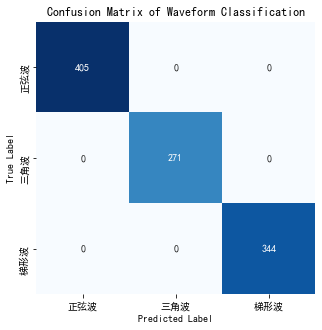

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 设置绘图大小
plt.figure(figsize=(5, 5))

# 使用 seaborn 绘制热力图
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['正弦波', '三角波', '梯形波'],
            yticklabels=['正弦波', '三角波', '梯形波'])

# 添加标题和标签
plt.title('Confusion Matrix of Waveform Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# 显示图像
plt.show()


In [40]:
import pandas as pd

# 定义文件路径
file_path = r"E:/2024数模/C题论文/附件二（测试集）.xlsx"

# 读取Excel文件
data2 = pd.read_excel(file_path)

# 输出数据的前几行查看
print(data2.head())

   序号  温度，oC   频率，Hz 磁芯材料  0（磁通密度B，T）         1         2         3         4  \
0   1     25   56180  材料1   -0.101398 -0.099219 -0.097045 -0.094873 -0.092701   
1   2     25  125890  材料1   -0.031775 -0.031081 -0.030391 -0.029704 -0.029019   
2   3     25  224180  材料1   -0.066871 -0.065300 -0.063737 -0.062185 -0.060640   
3   4     25  282480  材料1   -0.023190 -0.022634 -0.022084 -0.021540 -0.020998   
4   5     50  199170  材料1   -0.077613 -0.075852 -0.074096 -0.072348 -0.070611   

          5  ...      1014      1015      1016      1017      1018      1019  \
0 -0.090534  ... -0.106739 -0.106970 -0.107198 -0.107405 -0.107564 -0.107633   
1 -0.028333  ... -0.034050 -0.034100 -0.034136 -0.034158 -0.034159 -0.034103   
2 -0.059101  ... -0.074207 -0.074200 -0.074168 -0.074077 -0.073844 -0.073352   
3 -0.020455  ... -0.027047 -0.027007 -0.026898 -0.026682 -0.026344 -0.025900   
4 -0.068883  ... -0.084331 -0.084361 -0.084376 -0.084366 -0.084294 -0.084046   

       1020      1021      1022 

In [42]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# 假设已经读取并处理好 data，训练好分类模型 model

# 提取 data2 的特征数据 (第5列到最后一列为磁通密度曲线)
features_test = data2.iloc[:, 4:]

# 计算统计特征
features_test['mean'] = features_test.mean(axis=1)
features_test['std'] = features_test.std(axis=1)
features_test['max'] = features_test.max(axis=1)
features_test['min'] = features_test.min(axis=1)
features_test['amplitude'] = features_test['max'] - features_test['min']
features_test['energy'] = np.sum(np.square(features_test), axis=1)

# 计算偏度和峰度
features_test['skewness'] = features_test.apply(lambda row: skew(row), axis=1)
features_test['kurtosis'] = features_test.apply(lambda row: kurtosis(row), axis=1)

# 使用之前训练的模型 model 对 data2 进行预测
y_pred_data2 = model.predict(features_test)

# 输出预测标签
print(y_pred_data2)


['三角波' '三角波' '三角波' '三角波' '三角波' '梯形波' '梯形波' '梯形波' '梯形波' '梯形波' '正弦波' '正弦波'
 '正弦波' '正弦波' '正弦波' '三角波' '三角波' '三角波' '三角波' '三角波' '三角波' '三角波' '三角波' '三角波'
 '三角波' '正弦波' '正弦波' '三角波' '正弦波' '三角波' '三角波' '三角波' '梯形波' '三角波' '三角波' '三角波'
 '三角波' '三角波' '三角波' '三角波' '梯形波' '三角波' '三角波' '三角波' '三角波' '正弦波' '正弦波' '正弦波'
 '正弦波' '正弦波' '三角波' '三角波' '三角波' '三角波' '三角波' '三角波' '三角波' '三角波' '三角波' '三角波'
 '三角波' '三角波' '三角波' '三角波' '三角波' '三角波' '三角波' '三角波' '三角波' '三角波' '三角波' '梯形波'
 '梯形波' '三角波' '三角波' '正弦波' '正弦波' '正弦波' '正弦波' '正弦波']


In [44]:
# 创建一个映射字典
waveform_mapping = {
    '正弦波': 1,
    '三角波': 2,
    '梯形波': 3
}

# 将 y_pred_data2 转换为 DataFrame
df = pd.DataFrame({
    'Waveform': y_pred_data2
})

# 通过映射生成第二列
df['Mapped'] = df['Waveform'].map(waveform_mapping)

# 将 DataFrame 写入 Excel 文件
df.to_excel('E:/2024数模/C题论文/predicted_waveform_with_mapping.xlsx', index=False)

# 打印输出
print(df)

   Waveform  Mapped
0       三角波       2
1       三角波       2
2       三角波       2
3       三角波       2
4       三角波       2
..      ...     ...
75      正弦波       1
76      正弦波       1
77      正弦波       1
78      正弦波       1
79      正弦波       1

[80 rows x 2 columns]
